# Titanic Dataset - Data Cleaning & Preprocessing
This notebook walks through the data cleaning and preprocessing steps applied to the Titanic dataset.

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

### Step 1: Load and Explore Dataset
We load the Titanic dataset and inspect its structure.

In [3]:
print(df.isnull().sum())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns='Cabin', errors='ignore')



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Step 2: Handle Missing Values
We identify and handle missing values using median for 'Age' and mode for 'Embarked'. The 'Cabin' column is dropped.

In [4]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

### Step 3: Encode Categorical Variables
We convert categorical features like 'Sex' and 'Embarked' into numerical format using one-hot encoding.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

### Step 4: Standardize Numerical Features
We standardize 'Age' and 'Fare' to bring them to the same scale using StandardScaler.

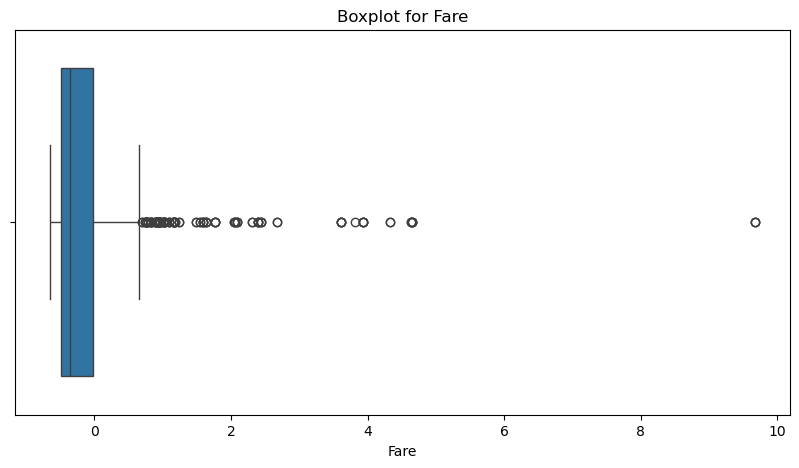

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot for Fare")
plt.show()
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

### Step 5: Visualize and Remove Outliers
We use a boxplot to visualize outliers in 'Fare' and remove them using the IQR method.

In [7]:
df.to_csv('cleaned_titanic_data.csv', index=False)